# Results on a random string (that has repetetions)

## Construction of the random string

1. Generated 10 random strings of length 5k
1. With replacement, randomly samples 20 strings from this collection

## How to compare two unitigs

1. HW 

In [151]:
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.rcParams['figure.dpi']=150
plt.rcParams["figure.figsize"] = (6, 4)
import pandas as pd

In [47]:
df = pd.read_csv('SDIN_observations_using_edlib_random_5_obs', sep=' ')

In [48]:
df

,ps,pd,d,i,S,D,I,N,S_est,D_est,I_est,N_est
0,0.01,0.01,0.01,0,11561,10475,11082,54487,11786,10497,11424,39085
1,0.01,0.01,0.01,1,11561,10475,11082,54487,11786,10497,11424,39085
2,0.01,0.01,0.01,2,11478,10782,11297,53746,11821,10660,11449,38152
3,0.01,0.01,0.01,3,11809,11377,10496,53296,12344,11140,10817,37732
4,0.01,0.01,0.01,4,10685,11615,10538,54949,11066,11560,10755,38916
...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.05,0.05,0.05,0,4834,4700,3934,3720,5379,4810,4688,3693
621,0.05,0.05,0.05,1,4834,4700,3934,3720,5379,4810,4688,3693
622,0.05,0.05,0.05,2,4451,4684,4015,4228,4210,4113,3994,3590
623,0.05,0.05,0.05,3,4655,4490,3936,4025,4579,4242,4251,3513


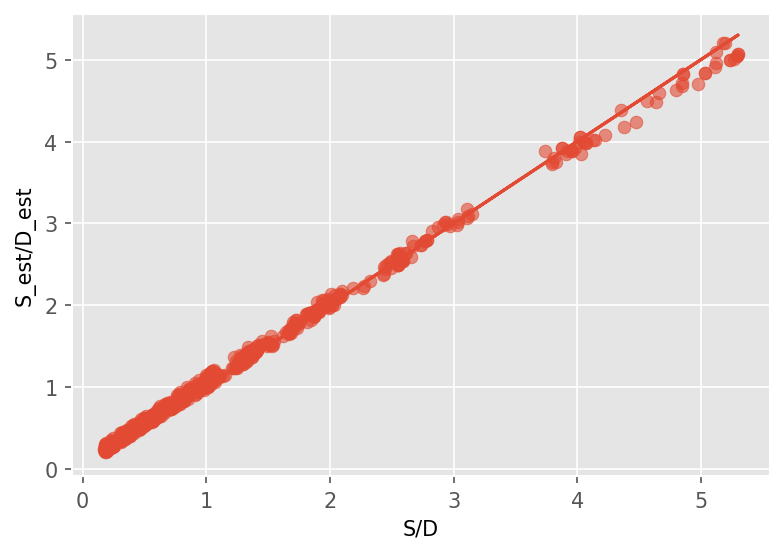

In [117]:
plt.scatter(df['S']/df['D'], df['S_est']/df['D_est'], alpha=0.6)
plt.plot(df['S']/df['D'], df['S']/df['D'])
plt.xlabel('S/D')
plt.ylabel('S_est/D_est')
plt.show()

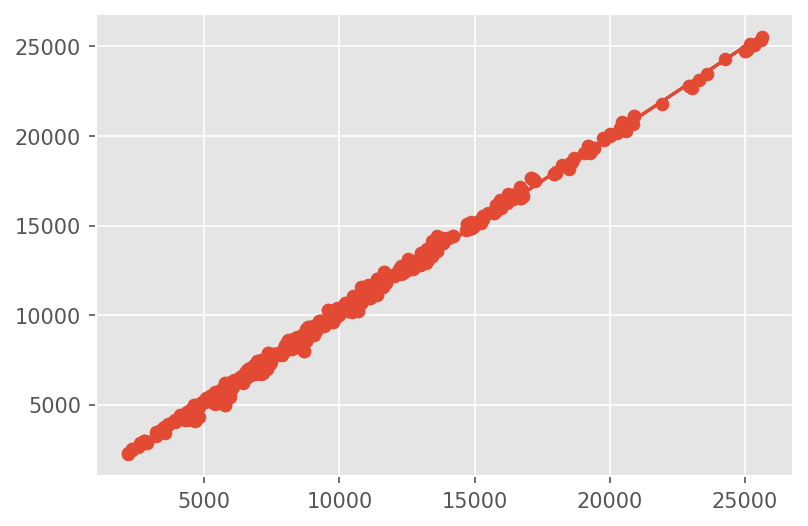

In [175]:
plt.scatter(df['D'], df['D_est'])
plt.plot(df['D'], df['D'])

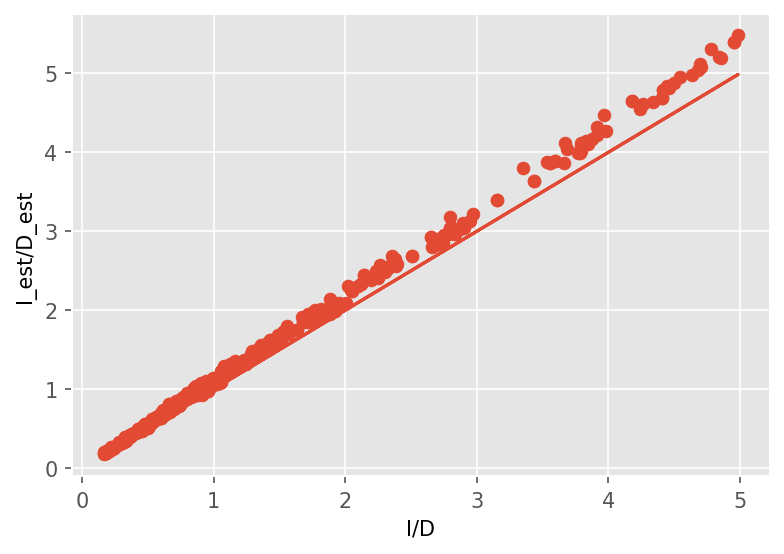

In [118]:
plt.scatter(df['I']/df['D'], df['I_est']/df['D_est'])
plt.plot(df['I']/df['D'], df['I']/df['D'])
plt.xlabel('I/D')
plt.ylabel('I_est/D_est')
plt.show()

# Estimated mutation rates in this random.fasta

It looks like S/D is well estimated in the random string. Let us use the following equations to solve for the mutation parameters $p_s$, $p_d$, and $d$

$$L_2 = L (1 - p_s + d)$$

$$ {f_A}' = f_A(1-p_s-p_d) + (L - f_A) \frac{p_s}{3} + \frac{L d}{4} $$

$$ \frac{p_s}{p_d} = \frac{S}{D} $$

In [53]:
df2 = pd.read_csv('estimated_rates_using_edlib_random_5_obs', sep=' ')

In [54]:
df2

,ps,pd,d,i,subst_rate,del_rate,ins_rate,subst_rate_est,del_rate_est,ins_rate_est
0,0.01,0.01,0.01,0,0.203428,0.184318,0.184818,0.204839,0.182437,0.182937
1,0.01,0.01,0.01,1,0.203428,0.184318,0.184818,0.204839,0.182437,0.182937
2,0.01,0.01,0.01,2,-0.019556,-0.018370,-0.018410,-0.019885,-0.017932,-0.017972
3,0.01,0.01,0.01,3,-0.058053,-0.055929,-0.056329,-0.059636,-0.053819,-0.054219
4,0.01,0.01,0.01,4,0.128539,0.139726,0.139406,0.130830,0.136671,0.136351
...,...,...,...,...,...,...,...,...,...,...
620,0.05,0.05,0.05,0,-0.614443,-0.597410,-0.599240,-0.635975,-0.568700,-0.570530
621,0.05,0.05,0.05,1,-0.614443,-0.597410,-0.599240,-0.635975,-0.568700,-0.570530
622,0.05,0.05,0.05,2,-0.726557,-0.764591,-0.764911,-0.750266,-0.732979,-0.733299
623,0.05,0.05,0.05,3,-1.133892,-1.093700,-1.093830,-1.153035,-1.068175,-1.068305


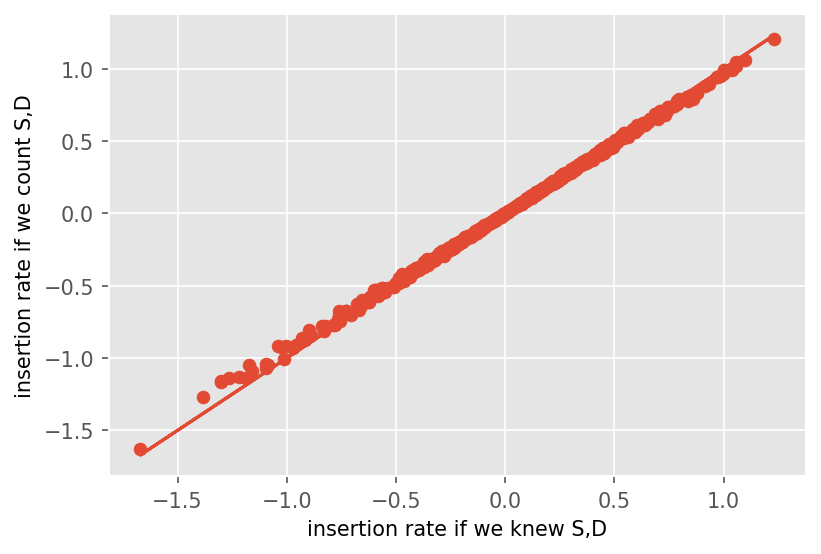

In [119]:
plt.scatter(df2['ins_rate'], df2['ins_rate_est'])
plt.plot(df2['ins_rate'], df2['ins_rate'])
plt.xlabel('insertion rate if we knew S,D')
plt.ylabel('insertion rate if we count S,D')
plt.show()

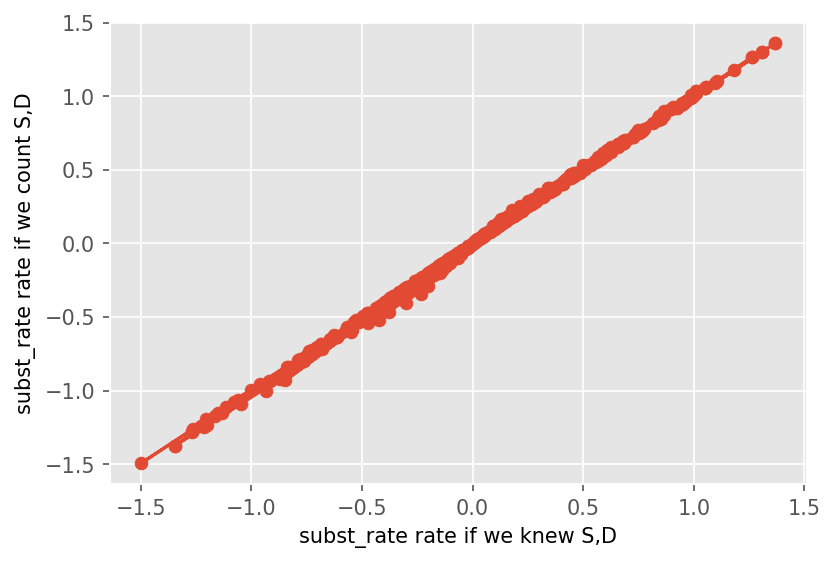

In [152]:
plt.scatter(df2['subst_rate'], df2['subst_rate_est'])
plt.plot(df2['subst_rate'], df2['subst_rate_est'])
plt.xlabel('subst_rate rate if we knew S,D')
plt.ylabel('subst_rate rate if we count S,D')
plt.show()

## Note that the values are messed up because the frequencies of A, C, G, T are all 25%.

# On ndl.fasta (100K length real genome): our estimates of S, D, I, N

In [58]:
df_ndl_observations = pd.read_csv('SDIN_observations_using_edlib_ndl_5_obs', sep=' ')

In [59]:
df_ndl_observations

,ps,pd,d,i,S,D,I,N,S_est,D_est,I_est,N_est
0,0.01,0.01,0.01,0,13110,11715,12488,60632,14241,12825,13754,58818
1,0.01,0.01,0.01,1,13110,11715,12488,60632,14241,12825,13754,58818
2,0.01,0.01,0.01,2,12538,12263,12769,60250,14433,13359,14130,59647
3,0.01,0.01,0.01,3,13207,12948,11887,59340,14711,13679,13046,57977
4,0.01,0.01,0.01,4,11836,12985,11854,61915,13403,14146,13320,60990
...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.05,0.05,0.05,0,5449,5242,4497,4240,7261,5897,6104,4609
621,0.05,0.05,0.05,1,5449,5242,4497,4240,7261,5897,6104,4609
622,0.05,0.05,0.05,2,4974,5277,4373,4696,6995,5952,5868,5171
623,0.05,0.05,0.05,3,5056,5114,4315,4460,6781,5957,6002,5006


Text(0, 0.5, 'N_est')

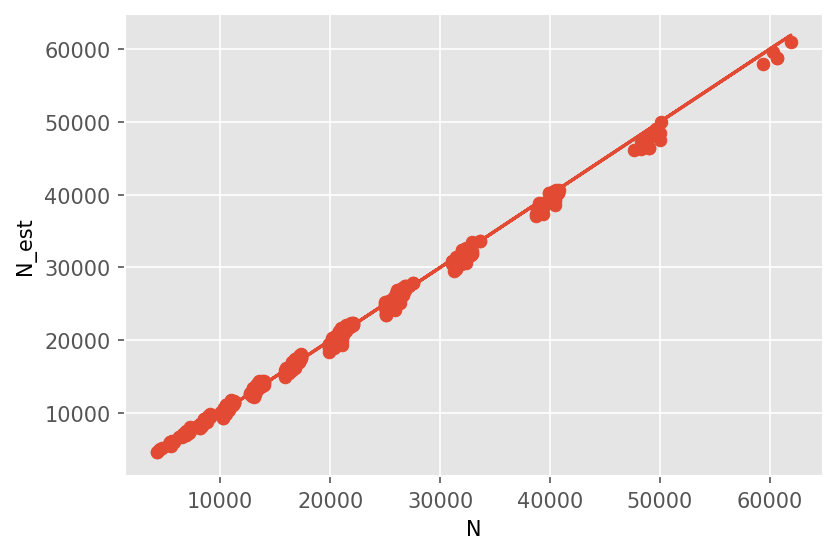

In [120]:
columns = ['N', 'N_est']
plt.scatter(df_ndl_observations[columns[0]], df_ndl_observations[columns[1]])
plt.plot( df_ndl_observations[columns[0]], df_ndl_observations[columns[0]] )
plt.xlabel('N')
plt.ylabel('N_est')

Text(0, 0.5, 'S (estimated)')

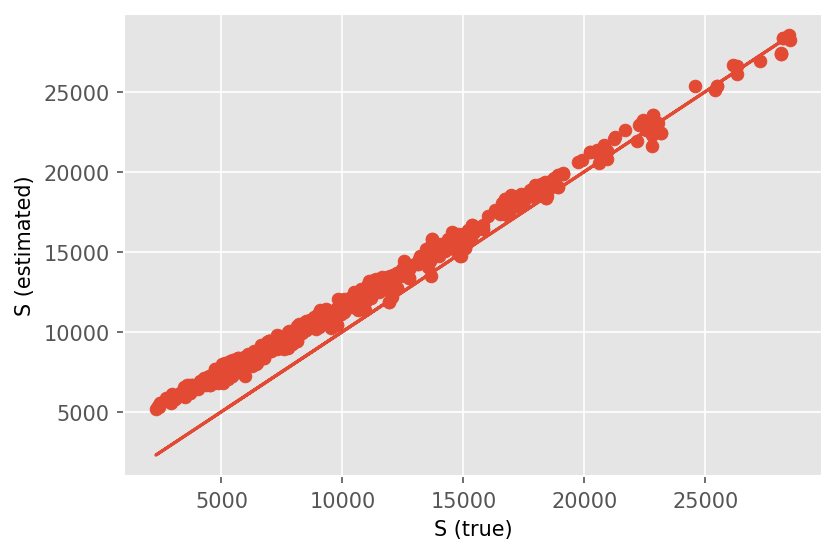

In [153]:
columns = ['S', 'S_est']
plt.scatter(df_ndl_observations[columns[0]], df_ndl_observations[columns[1]])
plt.plot( df_ndl_observations[columns[0]], df_ndl_observations[columns[0]] )
plt.xlabel('S (true)')
plt.ylabel('S (estimated)')

Text(0, 0.5, 'D (estimated)')

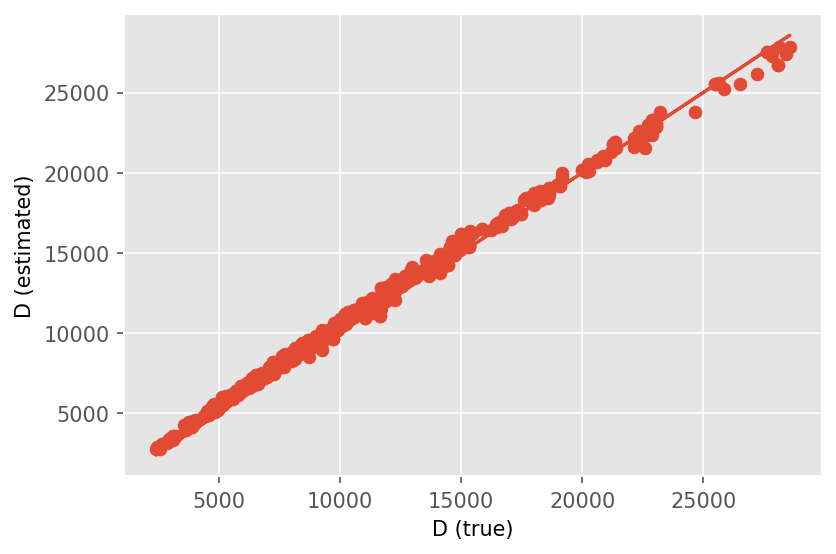

In [154]:
columns = ['D', 'D_est']
plt.scatter(df_ndl_observations[columns[0]], df_ndl_observations[columns[1]])
plt.plot( df_ndl_observations[columns[0]], df_ndl_observations[columns[0]] )
plt.xlabel('D (true)')
plt.ylabel('D (estimated)')

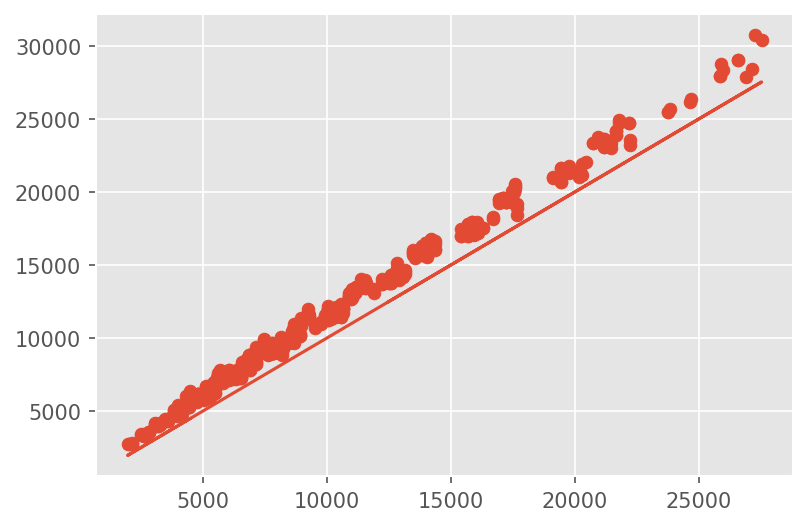

In [155]:
columns = ['I', 'I_est']
plt.scatter(df_ndl_observations[columns[0]], df_ndl_observations[columns[1]])
plt.plot( df_ndl_observations[columns[0]], df_ndl_observations[columns[0]] )

Text(0, 0.5, 'S_est / D_est')

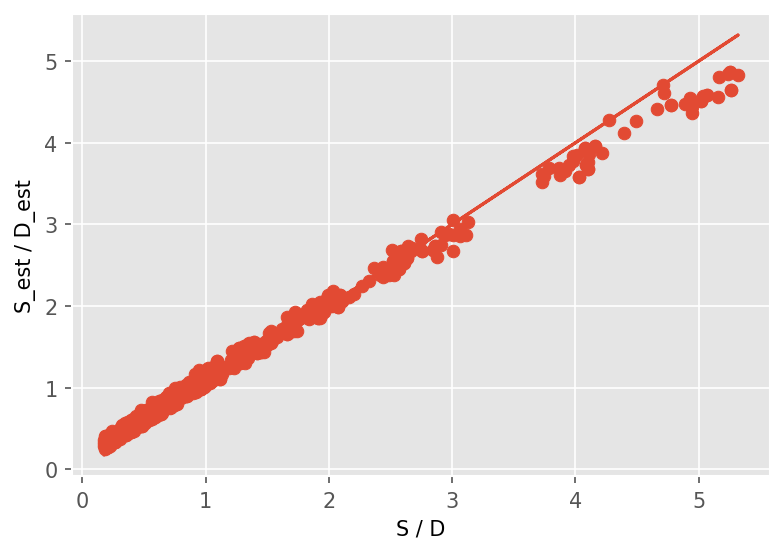

In [156]:
plt.scatter( df_ndl_observations['S']/df_ndl_observations['D'], df_ndl_observations['S_est']/df_ndl_observations['D_est'] )
plt.plot( df_ndl_observations['S']/df_ndl_observations['D'], df_ndl_observations['S']/df_ndl_observations['D'] )
plt.xlabel('S / D')
plt.ylabel('S_est / D_est')

Text(0, 0.5, 'D_est / S_est')

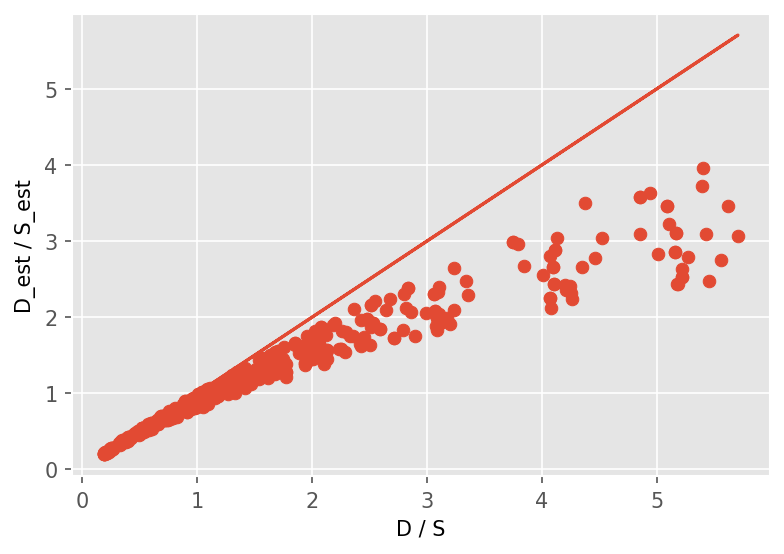

In [157]:
plt.scatter( df_ndl_observations['D']/df_ndl_observations['S'], df_ndl_observations['D_est']/df_ndl_observations['S_est'] )
plt.plot( df_ndl_observations['D']/df_ndl_observations['S'], df_ndl_observations['D']/df_ndl_observations['S'] )
plt.xlabel('D / S')
plt.ylabel('D_est / S_est')

### It looks like $S/D$ is not a good choice here

Text(0, 0.5, 'D_est / N_est')

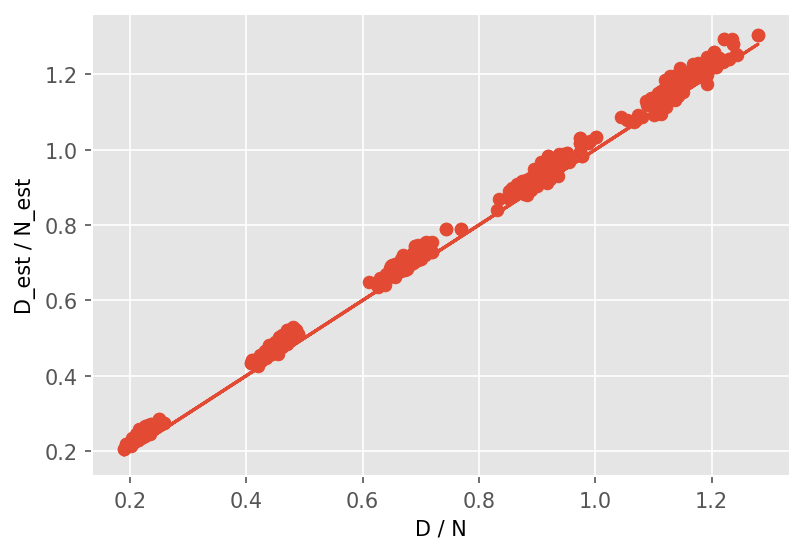

In [158]:
plt.scatter( df_ndl_observations['D']/df_ndl_observations['N'], df_ndl_observations['D_est']/df_ndl_observations['N_est'] )
plt.plot( df_ndl_observations['D']/df_ndl_observations['N'], df_ndl_observations['D']/df_ndl_observations['N'] )
plt.xlabel('D / N')
plt.ylabel('D_est / N_est')

Text(0, 0.5, 'N_est / D_est')

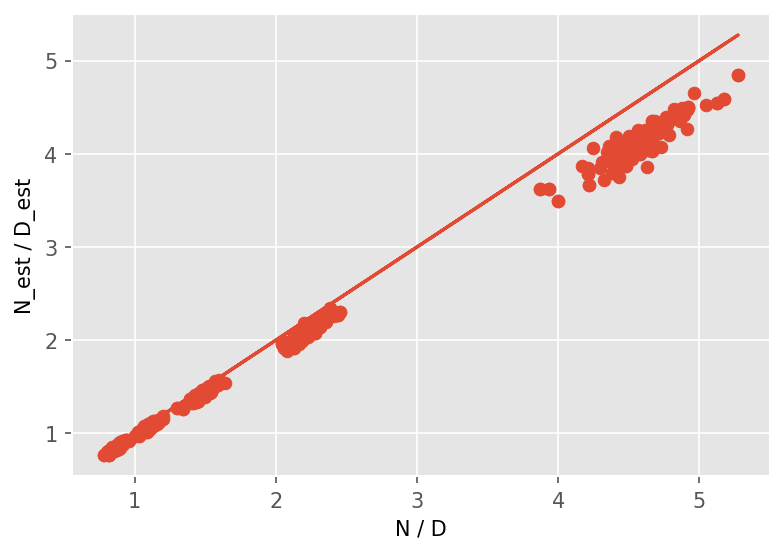

In [159]:
plt.scatter( df_ndl_observations['N']/df_ndl_observations['D'], df_ndl_observations['N_est']/df_ndl_observations['D_est'] )
plt.plot( df_ndl_observations['N']/df_ndl_observations['D'], df_ndl_observations['N']/df_ndl_observations['D'] )
plt.xlabel('N / D')
plt.ylabel('N_est / D_est')

## $D/N$ is much better. Let us use the following equation instead:

$$ E[S] = K_1 ~ k ~ \big(1-p_s-p_d\big)^{k-1} ~ p_s ~ \Big( \frac{1}{1+d} \Big)^{k-1} $$

$$ E[D] = K_1 ~ k ~ \big(1-p_s-p_d\big)^{k-1} ~ p_d ~ \Big( \frac{1}{1+d} \Big)^{k-1} $$

$$ E[N] = K_1 ~ \big(1-p_s-p_d\big)^k ~ \Big( \frac{1}{1+d} \Big)^{k-1} $$

Using first and second equations, we got the linear equation with $p_s$ and $p_d$. Instead, by using the second and the third equation, we get:

$$ \frac{E[D]}{E[N]} = k ~ \frac{p_d}{1-p_s-p_d} $$

The following estimates are using this

In [161]:
df_ndl_estimated_values = pd.read_csv('estimated_rates_using_edlib_ndl_5_obs', sep=' ')

In [68]:
df_ndl_estimated_values

,ps,pd,d,i,subst_rate,del_rate,ins_rate,subst_rate_est,del_rate_est,ins_rate_est
0,0.01,0.01,0.01,0,0.009961,0.008902,0.009312,0.009930,0.008943,0.009353
1,0.01,0.01,0.01,1,0.009961,0.008902,0.009312,0.009930,0.008943,0.009353
2,0.01,0.01,0.01,2,0.010621,0.010388,0.010353,0.010868,0.010059,0.010024
3,0.01,0.01,0.01,3,0.010054,0.009857,0.009545,0.010279,0.009558,0.009245
4,0.01,0.01,0.01,4,0.008261,0.009063,0.008777,0.008405,0.008871,0.008585
...,...,...,...,...,...,...,...,...,...,...
620,0.05,0.05,0.05,0,0.052447,0.050455,0.048759,0.056110,0.045570,0.043875
621,0.05,0.05,0.05,1,0.052447,0.050455,0.048759,0.056110,0.045570,0.043875
622,0.05,0.05,0.05,2,0.048961,0.051943,0.051756,0.053668,0.045666,0.045479
623,0.05,0.05,0.05,3,0.051840,0.052434,0.051971,0.054957,0.048279,0.047815


array([<Axes: title={'center': 'ins_rate'}, xlabel='d'>,
       <Axes: title={'center': 'ins_rate_est'}, xlabel='d'>], dtype=object)

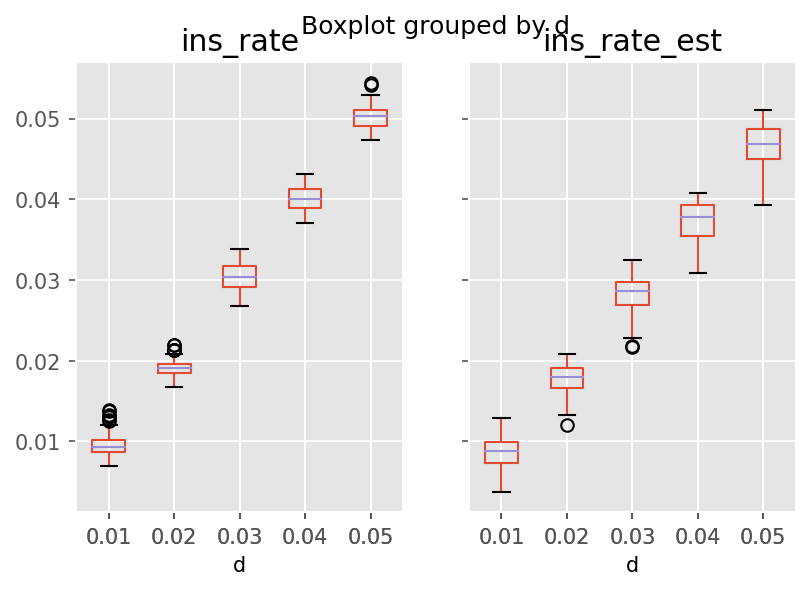

In [167]:
true_colname = 'd'
colname_by_knowing_SD = 'ins_rate'
colname_by_counting_SD = 'ins_rate_est'

df_ndl_estimated_values.boxplot(by=true_colname, column=[colname_by_knowing_SD, colname_by_counting_SD])


# The above is by using S/D

In [70]:
df_ndl_estimated_values = pd.read_csv('estimated_rates_using_edlib_ndl_new_estimator_5_obs', sep=' ')

In [71]:
df_ndl_estimated_values

,ps,pd,d,i,subst_rate,del_rate,ins_rate,subst_rate_est,del_rate_est,ins_rate_est
0,0.01,0.01,0.01,0,0.009961,0.008902,0.009312,0.009000,0.010184,0.010594
1,0.01,0.01,0.01,1,0.009961,0.008902,0.009312,0.009000,0.010184,0.010594
2,0.01,0.01,0.01,2,0.010621,0.010388,0.010353,0.010582,0.010441,0.010405
3,0.01,0.01,0.01,3,0.010054,0.009857,0.009545,0.009191,0.011008,0.010696
4,0.01,0.01,0.01,4,0.008261,0.009063,0.008777,0.006921,0.010848,0.010563
...,...,...,...,...,...,...,...,...,...,...
620,0.05,0.05,0.05,0,0.052447,0.050455,0.048759,0.049342,0.054594,0.052899
621,0.05,0.05,0.05,1,0.052447,0.050455,0.048759,0.049342,0.054594,0.052899
622,0.05,0.05,0.05,2,0.048961,0.051943,0.051756,0.050931,0.049317,0.049129
623,0.05,0.05,0.05,3,0.051840,0.052434,0.051971,0.053081,0.050780,0.050316


array([<Axes: title={'center': 'ins_rate'}, xlabel='d'>,
       <Axes: title={'center': 'ins_rate_est'}, xlabel='d'>], dtype=object)

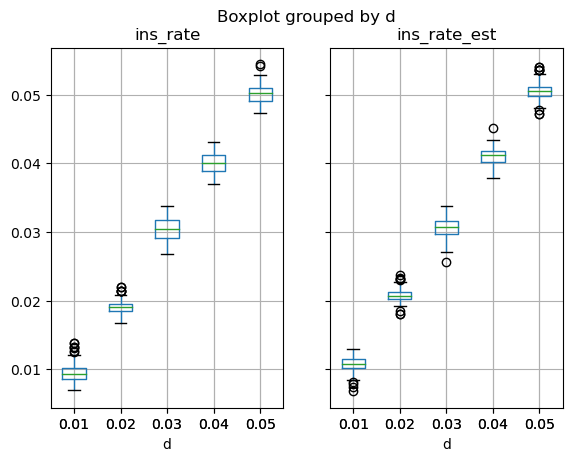

In [81]:
true_colname = 'd'
colname_by_knowing_SD = 'ins_rate'
colname_by_counting_SD = 'ins_rate_est'

true_values = df_ndl_estimated_values[true_colname]
estimates_by_knowing_true_SD = df_ndl_estimated_values[colname_by_knowing_SD]
estimates_by_counting_SD = df_ndl_estimated_values[colname_by_counting_SD]

df_ndl_estimated_values.boxplot(column=[colname_by_knowing_SD, colname_by_counting_SD], by=true_colname)

#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.scatter(true_values, estimates_by_knowing_true_SD)
#ax1.set_title('By knowing true S and D')
#ax2.scatter(true_values, estimates_by_counting_SD)
#ax2.set_title('By counting S and D using EDLIB')
#fig.suptitle(f'Estimating {true_colname}')
#ax1.grid()
#ax2.grid()

# This is by using N/D


# Let us now run the same on a Staphylococcus genome (about 3 million nts)

In [171]:
df_SDIN_staphylo = pd.read_csv('SDIN_observations_using_edlib_staphylo_5_obs', sep=' ')

In [172]:
df_SDIN_staphylo

,ps,pd,d,i,S,D,I,N,S_est,D_est,I_est,N_est
0,0.02,0.01,0.04,3,289788,145180,540326,658369,257332,118689,474102,526834
1,0.02,0.01,0.04,4,290801,144952,546517,656976,258319,118468,481283,529115
2,0.02,0.01,0.05,0,237086,120490,549235,546434,220385,101989,500504,452522
3,0.02,0.01,0.05,1,237086,120490,549235,546434,220385,101989,500504,452522
4,0.02,0.01,0.05,2,236310,119795,550078,541762,213370,98499,487370,434718
...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.05,0.05,0.05,0,130652,130114,111379,109619,114719,102976,101732,84145
478,0.05,0.05,0.05,1,130652,130114,111379,109619,114719,102976,101732,84145
479,0.05,0.05,0.05,2,131799,129144,111228,108964,109906,96103,97595,79177
480,0.05,0.05,0.05,3,127823,129540,110623,110383,109462,98363,100318,81701


Text(0, 0.5, 'S_est')

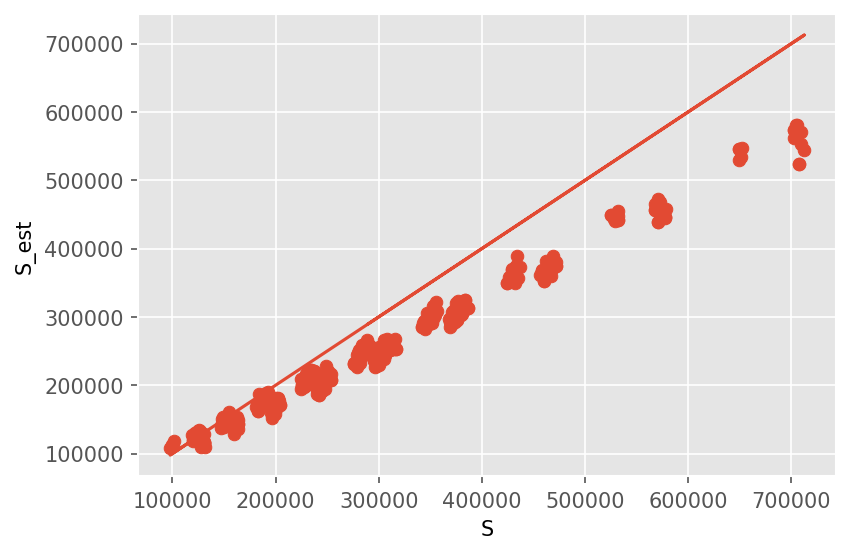

In [142]:
col_true = 'S'
col_est = 'S_est'

data = df_SDIN_staphylo
plt.scatter(data[col_true], data[col_est])
plt.plot(data[col_true], data[col_true])
plt.xlabel(col_true)
plt.ylabel(col_est)

Text(0, 0.5, 'D_est')

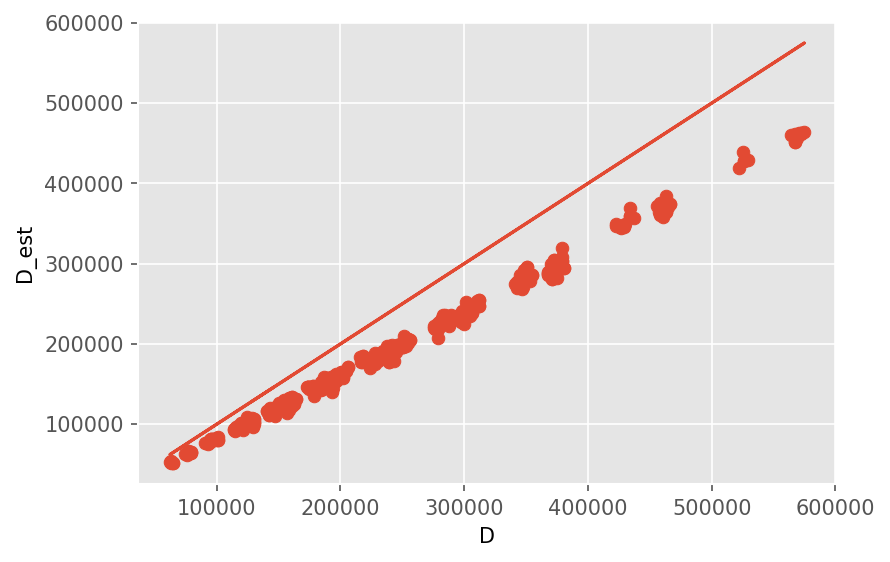

In [143]:
col_true = 'D'
col_est = 'D_est'

data = df_SDIN_staphylo
plt.scatter(data[col_true], data[col_est])
plt.plot(data[col_true], data[col_true])
plt.xlabel(col_true)
plt.ylabel(col_est)

Text(0, 0.5, 'I_est')

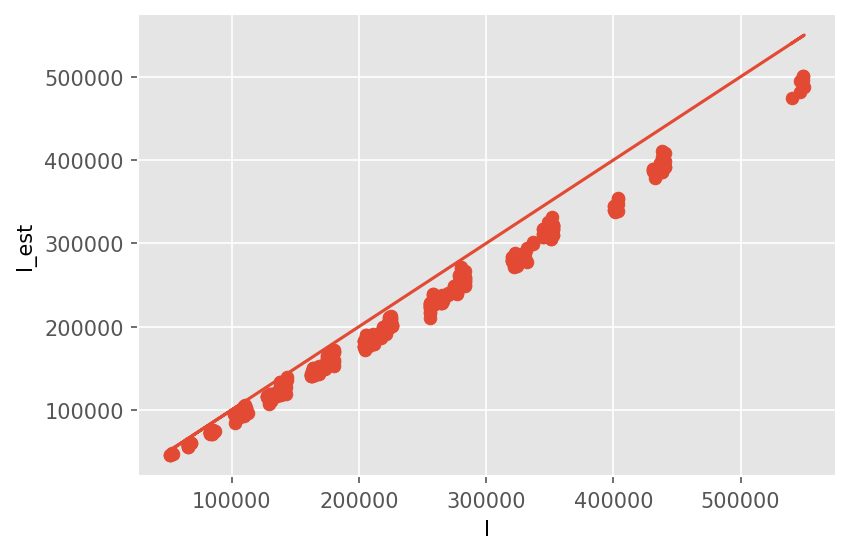

In [144]:
col_true = 'I'
col_est = 'I_est'

data = df_SDIN_staphylo
plt.scatter(data[col_true], data[col_est])
plt.plot(data[col_true], data[col_true])
plt.xlabel(col_true)
plt.ylabel(col_est)

Text(0, 0.5, 'N_est')

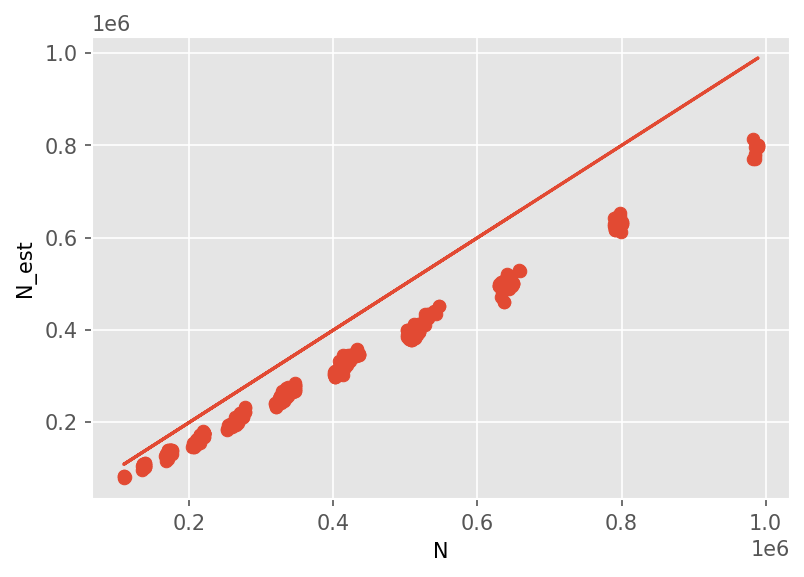

In [145]:
col_true = 'N'
col_est = 'N_est'

data = df_SDIN_staphylo
plt.scatter(data[col_true], data[col_est])
plt.plot(data[col_true], data[col_true])
plt.xlabel(col_true)
plt.ylabel(col_est)

Text(0, 0.5, 'S_est/D_est')

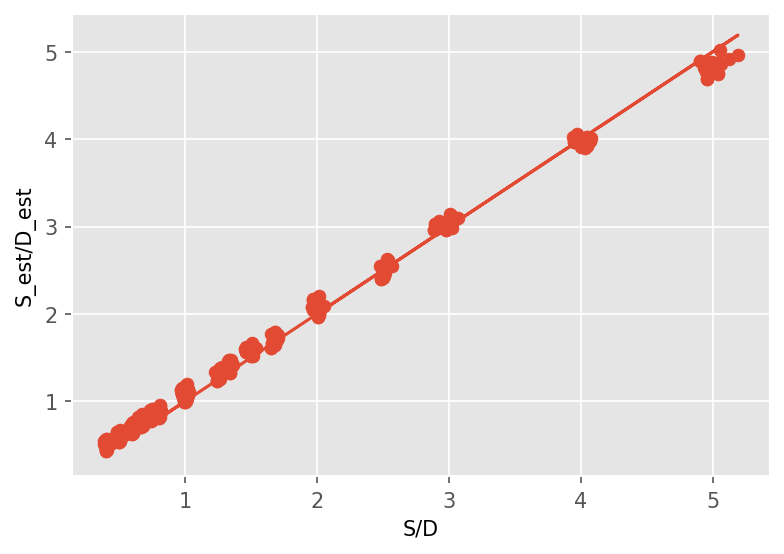

In [146]:
col1 = 'S'
col1est = 'S_est'
col2 = 'D'
col2est = 'D_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

Text(0, 0.5, 'D_est/S_est')

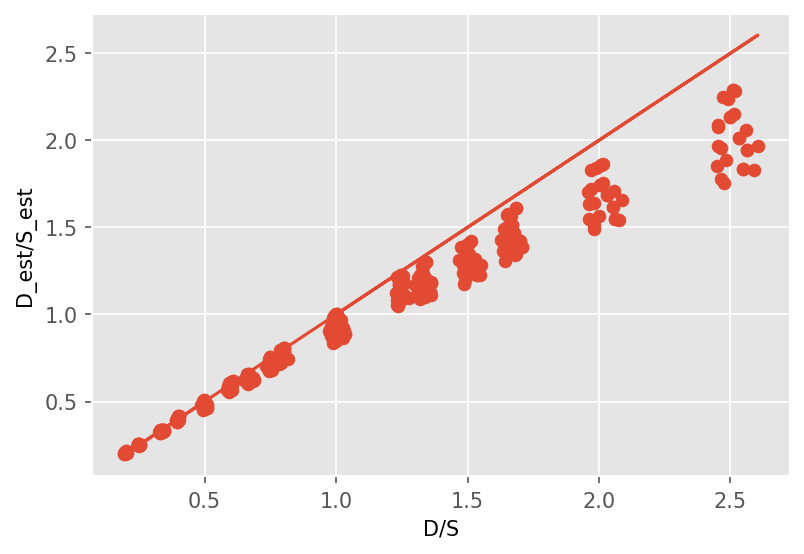

In [168]:
col1 = 'D'
col1est = 'D_est'
col2 = 'S'
col2est = 'S_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

Text(0, 0.5, 'S_est/N_est')

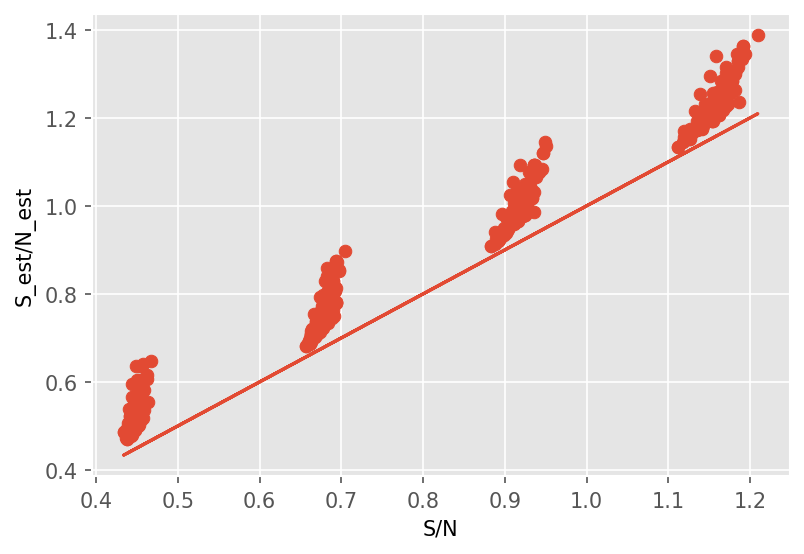

In [147]:
col1 = 'S'
col1est = 'S_est'
col2 = 'N'
col2est = 'N_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

Text(0, 0.5, 'N_est/S_est')

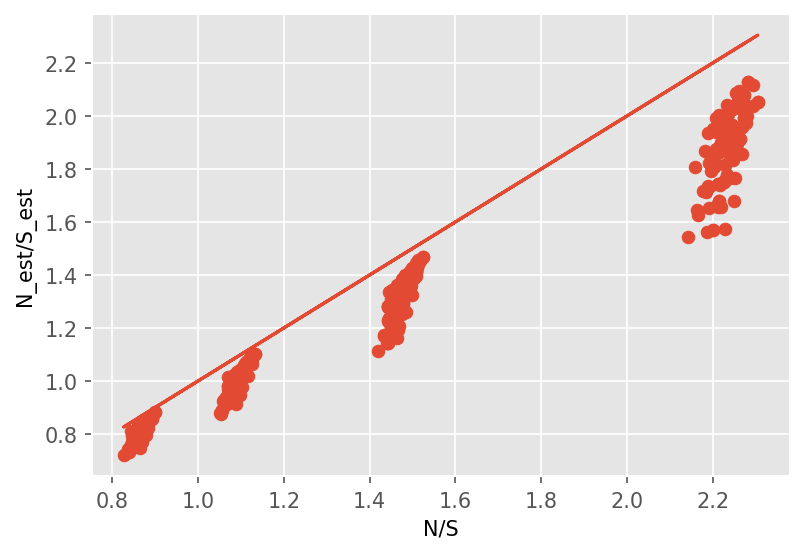

In [148]:
col1 = 'N'
col1est = 'N_est'
col2 = 'S'
col2est = 'S_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

Text(0, 0.5, 'D_est/N_est')

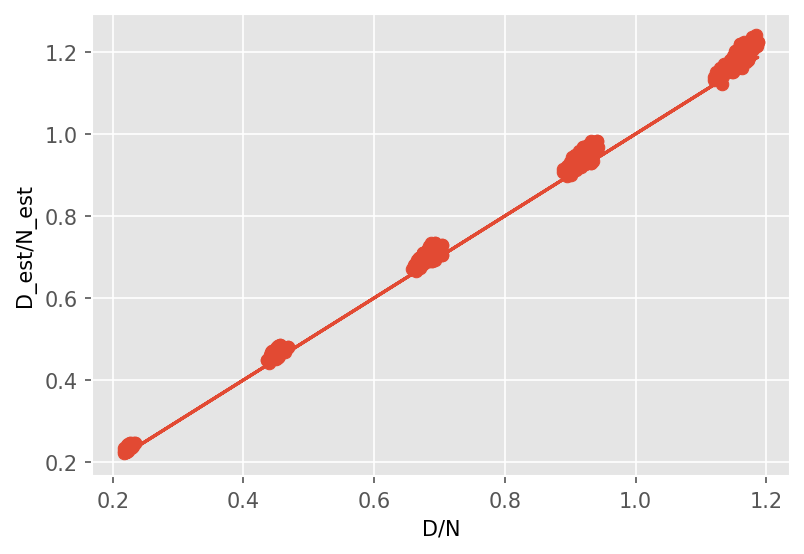

In [149]:
col1 = 'D'
col1est = 'D_est'
col2 = 'N'
col2est = 'N_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

Text(0, 0.5, 'N_est/D_est')

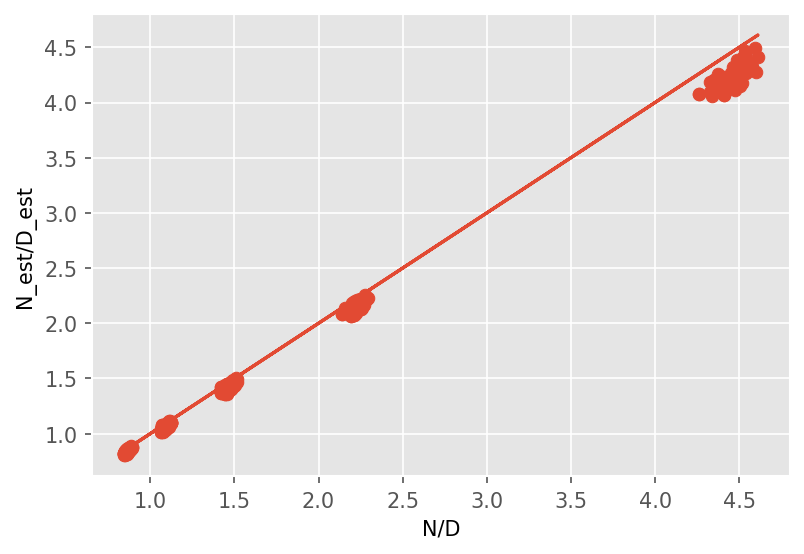

In [150]:
col1 = 'N'
col1est = 'N_est'
col2 = 'D'
col2est = 'D_est'
data = df_SDIN_staphylo

plt.scatter(data[col1]/data[col2], data[col1est]/data[col2est])
plt.plot(data[col1]/data[col2], data[col1]/data[col2])
plt.xlabel(f'{col1}/{col2}')
plt.ylabel(f'{col1est}/{col2est}')

array([<Axes: title={'center': 'subst_rate'}, xlabel='ps'>,
       <Axes: title={'center': 'subst_rate_est'}, xlabel='ps'>],
      dtype=object)

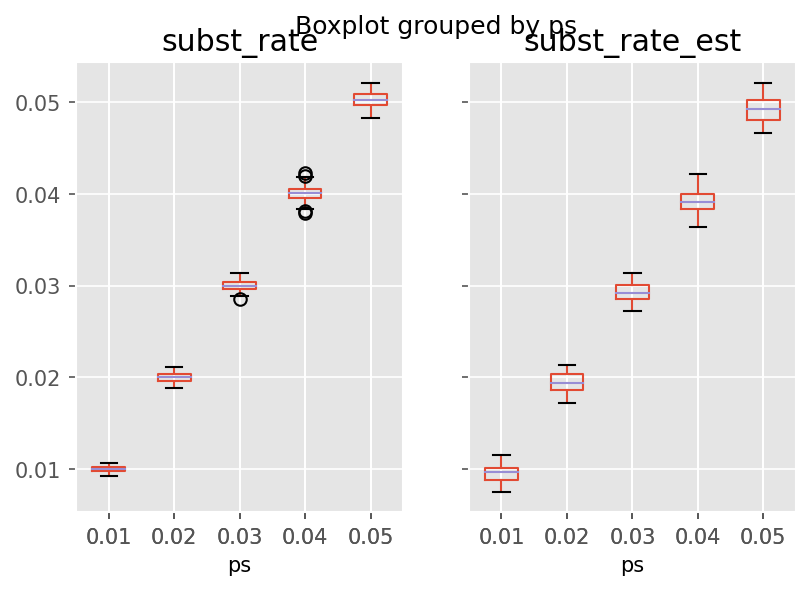

In [177]:
df_estimated_rates_staphylococcus = pd.read_csv('estimated_rates_using_edlib_staphylo_new_estimator_5_obs_pieced_unitigs', sep=' ')
true_colname = 'ps'
colname_by_knowing_SD = 'subst_rate'
colname_by_counting_SD = 'subst_rate_est'

df_estimated_rates_staphylococcus.boxplot(column=[colname_by_knowing_SD, colname_by_counting_SD], by=true_colname)

# Compute mutation rate using SMM

To do so, we simply did the following:

$$
L = \frac{L_1 + L_2}{2}
$$

$$
E[N] = (L - k + 1) ~ (1 - p)^k
$$

where $N = $ number of shared $k$-mers

In [182]:
df_smm_random_est_rates = pd.read_csv('random_smm_subst_rates', sep='\t', header=None)
df_smm_random_est_rates.columns = ['ps', 'pd', 'd', 'i', 'p']
df_smm_random_est_rates

,ps,pd,d,i,p
0,0.01,0.01,0.01,0,0.043365
1,0.01,0.01,0.01,1,0.043365
2,0.01,0.01,0.01,2,0.044245
3,0.01,0.01,0.01,3,0.044840
4,0.01,0.01,0.01,4,0.043542
...,...,...,...,...,...
3120,0.05,0.05,0.05,5,0.137521
3121,0.05,0.05,0.05,6,0.138447
3122,0.05,0.05,0.05,7,0.136434
3123,0.05,0.05,0.05,8,0.138826


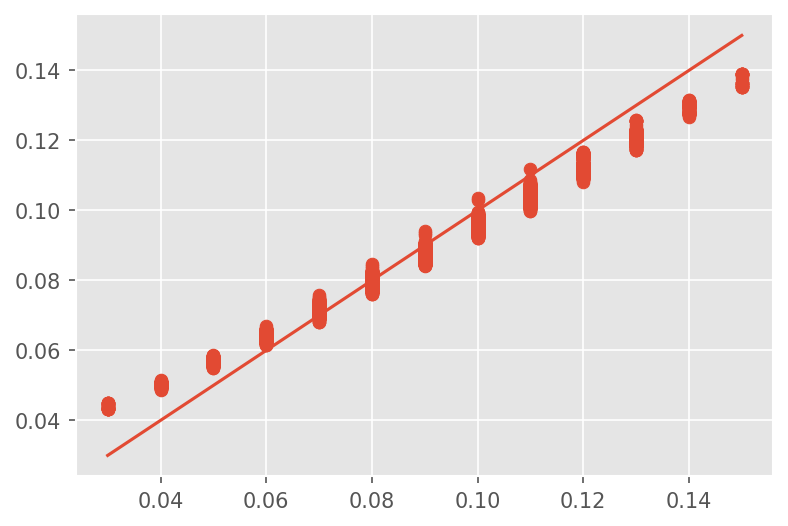

In [184]:
plt.scatter( df_smm_random_est_rates['ps']+df_smm_random_est_rates['pd']+df_smm_random_est_rates['d'], df_smm_random_est_rates['p'] )
plt.plot( df_smm_random_est_rates['ps']+df_smm_random_est_rates['pd']+df_smm_random_est_rates['d'], df_smm_random_est_rates['ps']+df_smm_random_est_rates['pd']+df_smm_random_est_rates['d'] )